In [18]:
import pandas as pd # Data analysis and manipulation tool
import numpy as np # A fundamental package for scientific computing with Python
import matplotlib.pyplot as plt # For interactive visualization in Python
import seaborn as sns


In [3]:
tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


Data Description
HHI: Household income

HHDL: Household debt level

Married: There are three categories for a taxpayer 0, 1, 2 with regards to marriage.

PoliticalParty: Name of the political party

CollegeGrads: Grade in College out of 5

AHHAge: Average household age

cars: number of cars in house

Filed in YYYY: Tax filed in given year YYYY

In [4]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [5]:
tax_data.describe(include='all')


,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democrat
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812,NaN
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029,NaN
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000,NaN
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000,NaN
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000,NaN


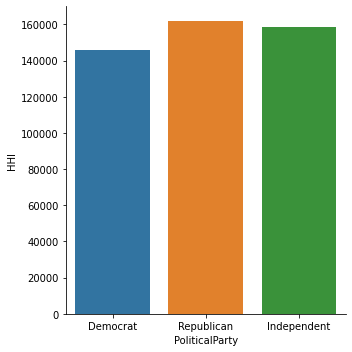

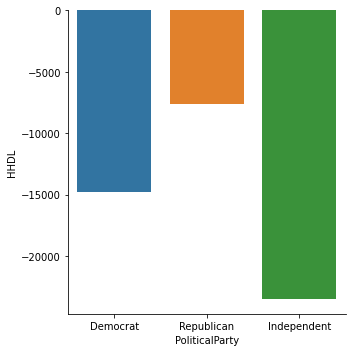

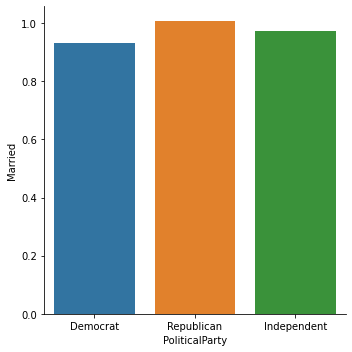

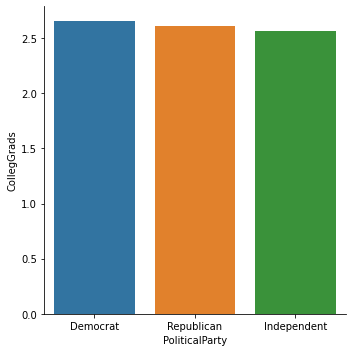

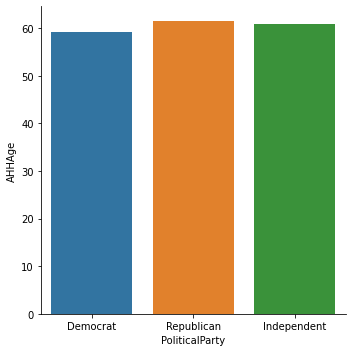

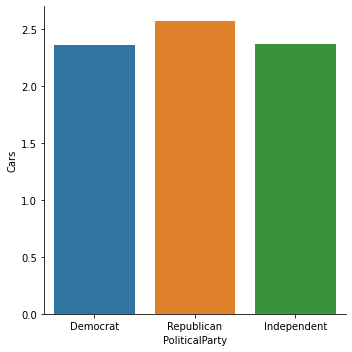

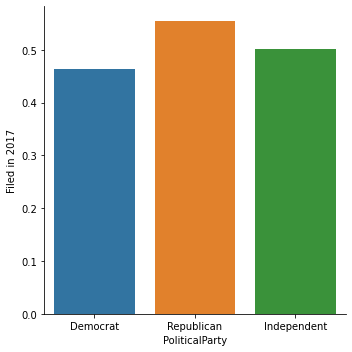

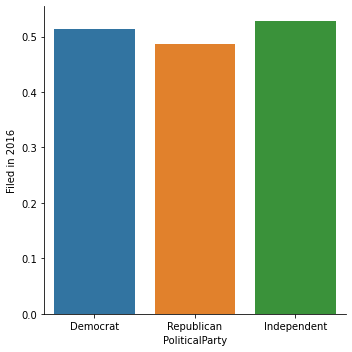

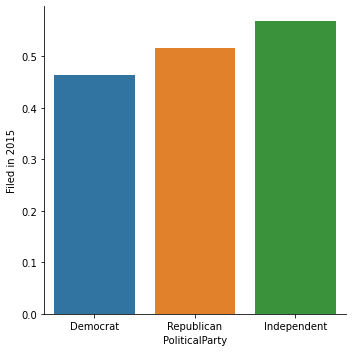

In [33]:
col = ['HHI', 'HHDL', 'Married', 'CollegGrads', 'AHHAge', 'Cars',
       'Filed in 2017', 'Filed in 2016', 'Filed in 2015']
for i in col:
  sns.catplot(x='PoliticalParty',y=i,data=tax_data,kind='bar',ci=None)
  plt.show()

In [6]:
## Separate feature columns and target column
# We have freedom to chose features on which we want to train our model

X=tax_data.drop('PoliticalParty',axis=1)
y=tax_data['PoliticalParty']


In [7]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# X_train: independent feature data for training the model
# y_train: dependent feature data for training the model
# X_test: independent feature data for testing the model; will be used to predict the target values
# y_test: original target values of X_test; We will compare this values with our predicted values.

# test_size = 0.25: 25% of the data will go for test set and 75% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

In [9]:
print("Original shape of dataset: {}".format(tax_data.shape)) # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape)) # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape)) # shape of testing dataset after split

Original shape of dataset: (803, 11)
Shape of training dataset: (602, 10)
Shape of testing dataset: (201, 10)


In [10]:
#Train and fit a logistic regression model on the training set.
# Import the Logistic Regression class from sklear.linear_model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
#Predictions
predictions = model.predict(X_test) # predict for test data i.e. X_test

In [12]:
len(predictions) # we have 201 records in X_test, so we have 201 predicted values

201

**Evaluation Metrics**
Evaluating machine learning algorithm is an important part of any project. Here we will use accuracy score to evaluate our model.

In [13]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

In [14]:
print(accuracy_score(y_test,predictions))

# y_test: the original target values that we have for X_test, predictions: we predicted target for X_test using our model

0.3582089552238806


In [15]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')
len(test_data)


201

In [16]:
target = model.predict(test_data) # predict for test data i.e. X_test

print(accuracy_score(y_test,target))

0.29850746268656714


In [17]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index 
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>